### Hypothesis testing
#### Mini project II
Elements of Data Science

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Hypothesis Testing

#### Create differences Test statistic 


In [3]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [4]:
sample_array = make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8)

positive = np.count_nonzero(diff_n(sample_array, 2)>0)
positive

In [6]:
negative = np.count_nonzero(diff_n(sample_array, 2) < 0)
negative

1

In [7]:
positive - negative

2

In [8]:
def changes(array, years = 1):
    "Return the number of increases minus the number of decreases after two years."
    differences = diff_n(array, years)  
    positives = np.count_nonzero(differences > 0)
    negatives = np.count_nonzero(differences < 0) 
    return positives - negatives  

### Berkeley Earth High Resolution data

In [12]:
berkdata = "data/Global_TAVG_monthly.csv"

In [13]:
bd = Table().read_table(berkdata)
bd.show(2)

Year,Month,Monthly,Anomaly,"Unc.,","Anomaly,","Unc., .1","Anomaly,.1",,"Unc., .2","Anomaly,.2",.1,"Unc., .3","Anomaly,.3",Unc.
1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,nan
1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,nan


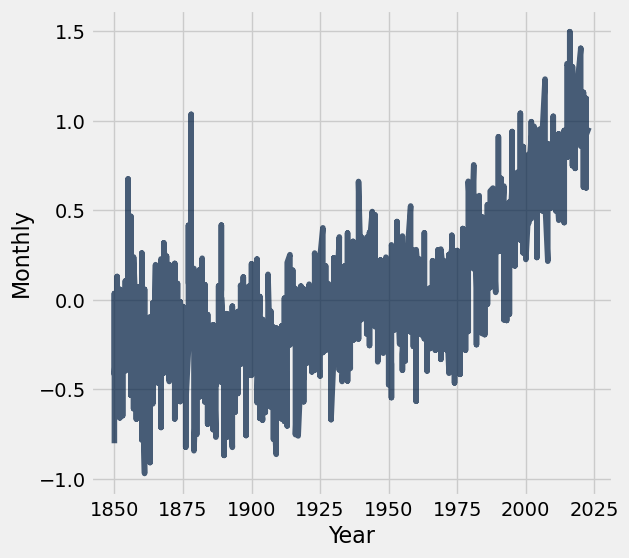

In [5]:
bd.plot("Year","Monthly")

Text(0.5, 1.0, 'Berkeley Earth High Res Glabal Data: December')

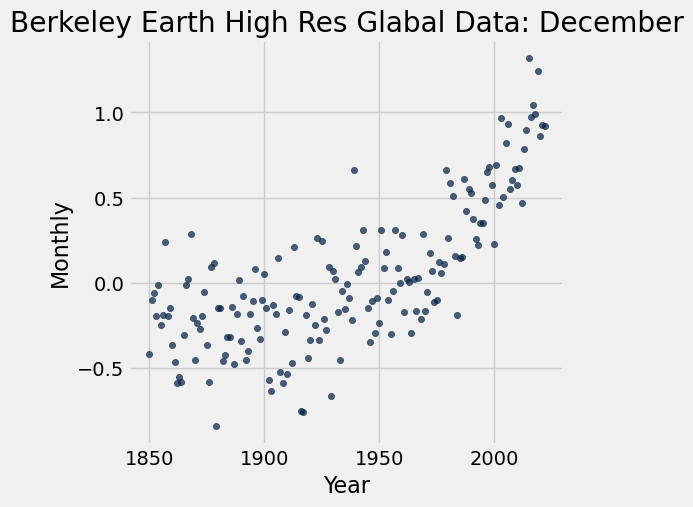

In [6]:
bd.where("Month",12).scatter("Year","Monthly")
plt.title("Berkeley Earth High Res Glabal Data: December")

Text(0.5, 1.0, 'Berkeley Earth High Res Glabal Data: September')

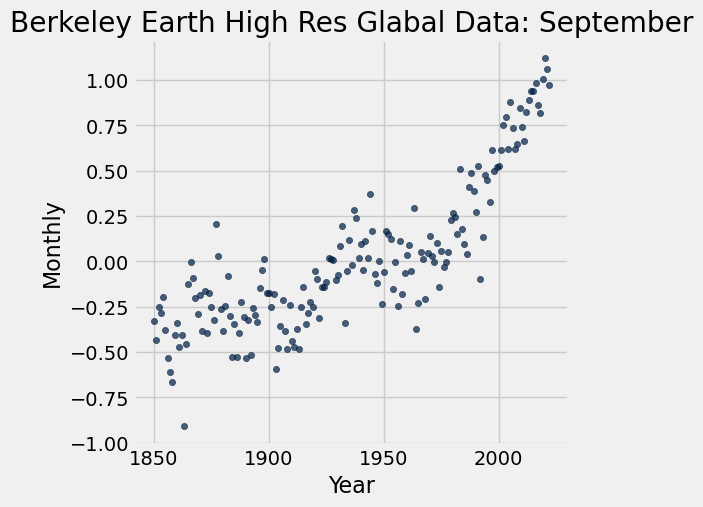

In [7]:
bd.where("Month",9).scatter("Year","Monthly")
plt.title("Berkeley Earth High Res Glabal Data: September")

In [14]:
september_temp = bd.where("Month",9).column("Monthly")

In [31]:
changes(september_temp,2)

11

In [16]:
december_temp = bd.where("Month",12).column("Monthly")

In [17]:
np.sum(diff_n(december_temp, 2)>0)

94

In [18]:
np.count_nonzero(diff_n(december_temp, 2)<0)

77

In [19]:
december_temp = bd.where("Month",12).column("Monthly")

In [20]:
changes(december_temp,2)

17

In [21]:
len(december_temp)

173

In [22]:
def sim_null(num=173):
    tchance = np.random.choice(["Increase","Decrease"],num)
    inc = np.sum(tchance=="Increase")
    dec = np.sum(tchance=="Decrease")
    return inc-dec

In [23]:
sim_null()

1

### Create empirical null distribution using 15000 samples

In [32]:
sample = []
for i in np.arange(15000):
    sample.append(sim_null(173))
sample = np.array(sample)

### Plot histogram of null distribution with test statistic overlay

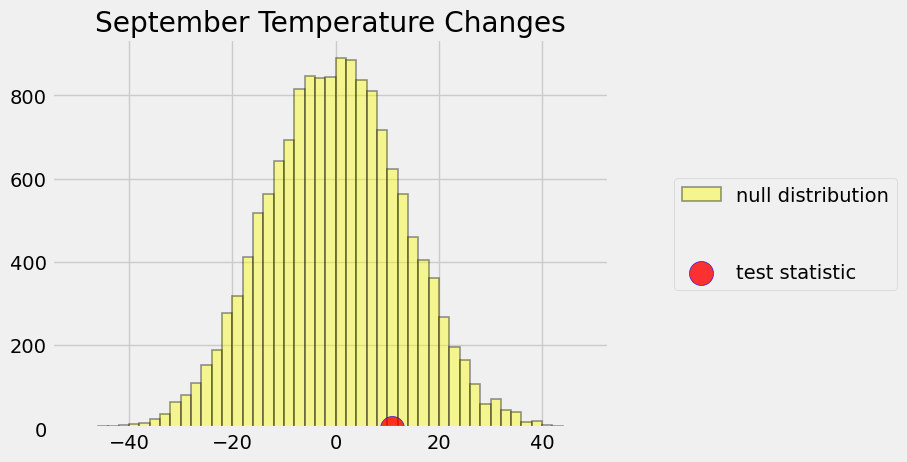

In [33]:
plt.hist(sample, label='null distribution', bins = np.arange(-50,50,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(changes(september_temp,2),0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('September Temperature Changes')
plt.show()

### Plot annotated histogram of null distribution with test statistic overlay and split color-coded sample

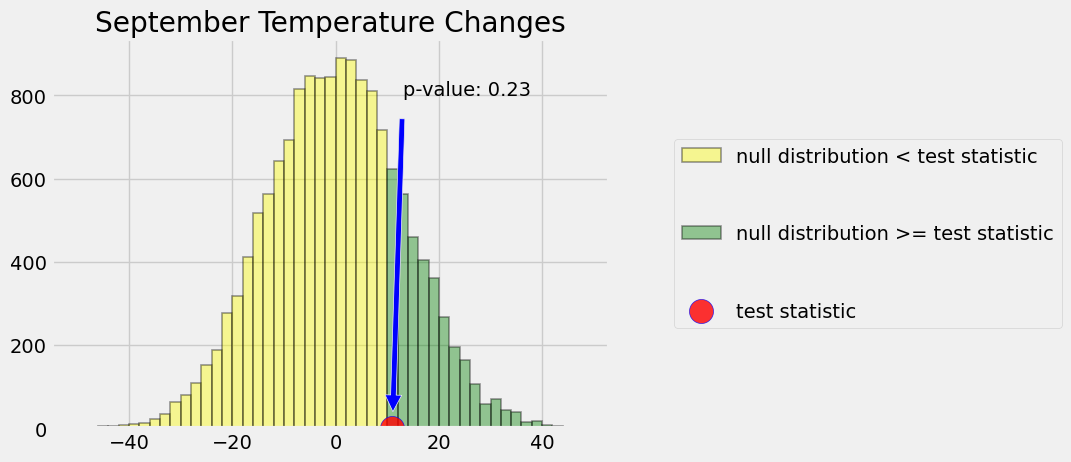

In [34]:
sample1 = sample[sample < changes(september_temp,2)]
sample2 = sample[sample >= changes(september_temp,2)]
plt.hist(sample1, label='null distribution < test statistic', bins = np.arange(-50,50,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.hist(sample2, label='null distribution >= test statistic', bins = np.arange(-50,50,2),color='green',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(changes(september_temp,2),0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
pval=np.count_nonzero(np.array(sample) >= changes(september_temp,2))/len(sample)
plt.annotate(f'p-value: {pval:.2f}',xy =(changes(september_temp,2), 0), 
                xytext =(changes(september_temp,2)+2, 800),  
                arrowprops = dict(facecolor ='blue', 
                                  shrink = 0.05),)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('September Temperature Changes')
plt.show()

In [26]:
np.count_nonzero(np.array(sample)>17)/len(sample)

0.08773333333333333

In [ ]:
len(sample)

In [36]:
bd_annual = bd.group('Year', np.average)
bd_annual

Year,Month average,Monthly average,Anomaly average,"Unc., average","Anomaly, average","Unc., .1 average","Anomaly,.1 average",average,"Unc., .2 average","Anomaly,.2 average",.1 average,"Unc., .3 average","Anomaly,.3 average",Unc. average
1850,6.5,-0.32625,,,,,,,,,,,,nan
1851,6.5,-0.215167,,,,,,,,,,,,nan
1852,6.5,-0.2535,,,,,,,,,,,,nan
1853,6.5,-0.198667,,,,,,,,,,,,nan
1854,6.5,-0.0935833,,,,,,,,,,,,nan
1855,6.5,-0.0328333,,,,,,,,,,,,nan
1856,6.5,-0.07575,,,,,,,,,,,,nan
1857,6.5,-0.36525,,,,,,,,,,,,nan
1858,6.5,-0.280333,,,,,,,,,,,,nan
1859,6.5,-0.22775,,,,,,,,,,,,nan


In [37]:
changes(bd_annual.column("Monthly average"),2)

22

In [38]:
np.count_nonzero(np.array(sample)>22)/len(sample)

0.048133333333333334

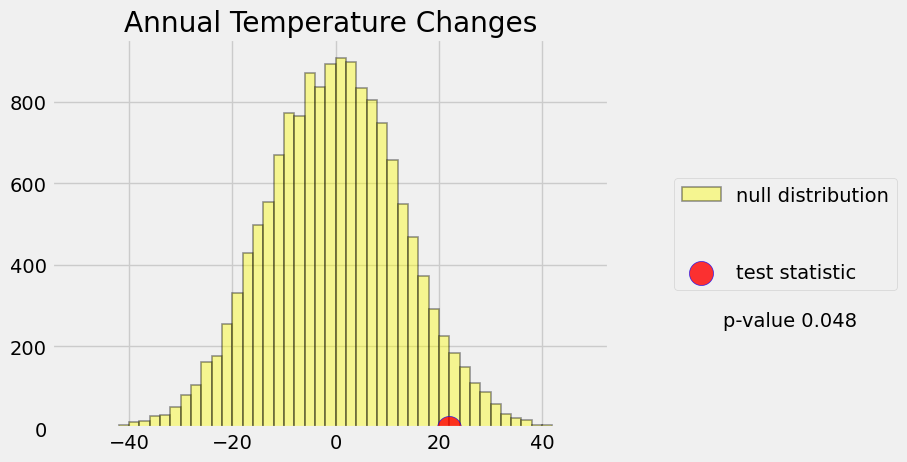

In [39]:
sample = []
for i in np.arange(15000):
    sample.append(sim_null(173))
plt.hist(sample, label='null distribution', bins = np.arange(-50,50,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(changes(bd_annual.column("Monthly average"),2),0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Annual Temperature Changes')
plt.text(75, 250, 'p-value 0.048', color = "black")
plt.show()

## Inference and biodiversity recovery: Mini-project II

In [40]:
# Plot description dataset
datafile = "../Mini Project II/data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT.where('PLOT_CODE','TORD10')

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary


In [45]:
np.unique(MSH_PLOT['PLOT_NAME'])

array(['Abraham Plain01', 'Abraham Plain02', 'Abraham Plain03',
       'Abraham Plain04', 'Abraham Plain05', 'Abraham Plain06',
       'Abraham Plain07', 'Abraham Plain08', 'Abraham Plain09',
       'Abraham Plain10', 'Butte CampA01', 'Butte CampA03',
       'Butte CampA04', 'Butte CampB01', 'Butte CampB02', 'Butte CampB03',
       'Butte CampB04', 'Butte CampB05', 'Butte CampB06', 'Butte CampB07',
       'Butte CampC01', 'Butte CampC02', 'Butte CampC03', 'Butte CampD01',
       'Butte CampD02', 'Butte CampD03', 'Butte CampD05', 'Lahar01',
       'Lahar02', 'Lahar04', 'Lahar05', 'Lahar06', 'Lahar07', 'Lahar08',
       'Pine CreekA01', 'Pine CreekA02', 'Pine CreekA03', 'Pine CreekA04',
       'Pine CreekB01', 'Pine CreekB02', 'Pine CreekB03', 'Pine CreekB04',
       'Pine CreekB05', 'Pine CrekE02', 'Pine CrekE03', 'Pine CrekE04',
       'Pumice Plain01', 'Pumice Plain02', 'Pumice Plain03',
       'Pumice Plain04', 'Pumice Plain05', 'Pumice Plain06',
       'Pumice Plain07', 'Pumice Plai

In [46]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

In [9]:
datafile = "../Mini Project II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR.show(2)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1


In [48]:
np.unique(MSH_YEAR['PLOT_NAME'])

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'],
      dtype='<U4')

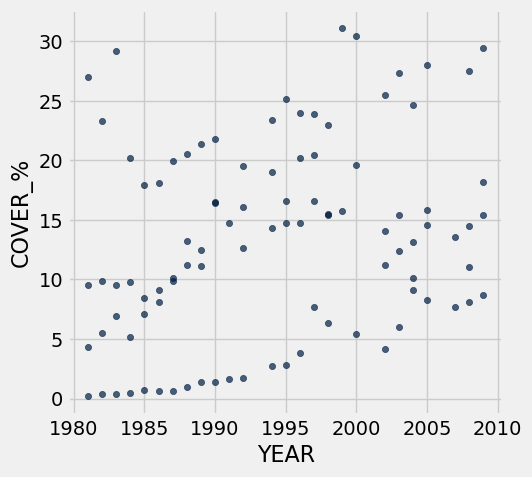

In [18]:
MSH_YEAR.where('PLOT_NAME','BUCD').scatter("YEAR","COVER_%")

In [19]:
MSH_YEAR.where('PLOT_NAME','BUCC').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1980,,,2.5,7,5.2,1.6625,0.96625,6.5
1981,,,2.5,10.75,9.925,1.8065,0.81925,7.45
1982,,,2.5,11.75,10.025,1.787,0.793,9.4
1983,,,2.5,11.75,10.225,1.63225,0.714,7.875
1984,,,2.5,12,8.375,1.50475,0.68175,8.175
1985,,,2.5,12.25,8.275,1.577,0.6715,7.05
1986,,,2.5,13.5,9.575,1.76,0.70275,9.475
1987,,,2.5,13.75,10.15,1.68225,0.66325,10.375
1988,,,2.5,15.25,14.525,1.63025,0.6055,11.375
1989,,,2.5,17,16.075,1.76775,0.63925,10.45


In [50]:
MSH_YEAR.where('PLOT_NAME','LAHR').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1982,,,4.71429,2.57143,0.257143,0.881857,1,2.21429
1983,,,4.71429,3.14286,0.314286,1.046,1,2.24286
1984,,,4.71429,6,0.8,1.62629,0.946143,1.9
1985,,,4.71429,9.42857,1.21429,2.06786,0.930571,1.88571
1986,,,4.71429,11.8571,1.55714,2.24129,0.917571,3.88571
1987,,,4.71429,11.7143,1.48571,2.30514,0.941429,3.42857
1988,,,4.71429,14.5714,2.61429,2.26943,0.854143,5.07143
1989,,,4.71429,16,3.2,2.32614,0.842857,5.32857
1990,,,4.71429,15.8571,4.52857,2.07386,0.751286,6.35714
1991,,,4.71429,17.8571,5.94286,2.095,0.728,7.71429


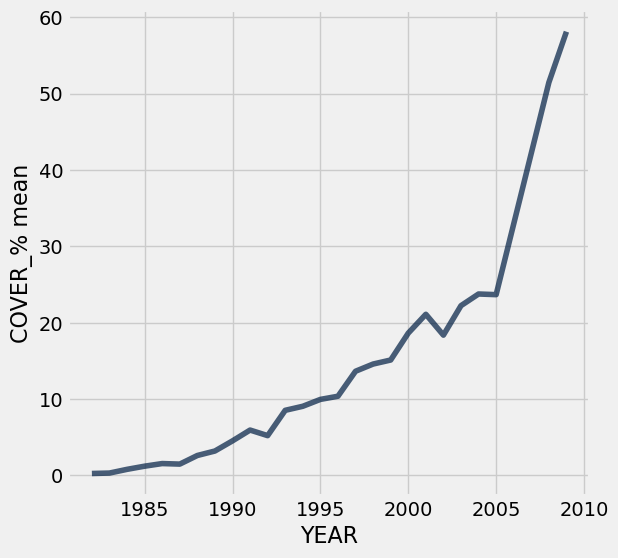

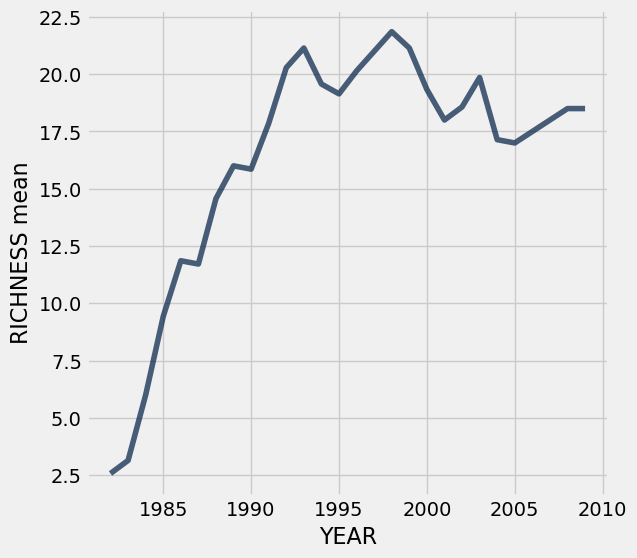

In [10]:
COVER_LAHR = MSH_YEAR.where('PLOT_NAME','LAHR').group("YEAR",np.mean)
COVER_LAHR.plot('YEAR','COVER_% mean')
COVER_LAHR.plot('YEAR','RICHNESS mean')

In [12]:
changes(COVER_LAHR.column('COVER_% mean'),1)

17

In [ ]:
MSH_YEAR.where('PLOT_NAME','LAHR').sort('YEAR').column('YEAR')

In [13]:
def simulate_under_null(num_chances_to_change):
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)     
    increases = sample.column("Chance sample").item(0) 
    decreases = sample.column("Chance sample").item(1)  
    return increases - decreases  

In [ ]:
uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 13)  

In [14]:
def empirical_distribution(tbl,iterations):
    num_changes = tbl.num_rows -1
    samples = make_array()
    for i in np.arange(iterations):
        samples = np.append(samples, simulate_under_null(num_changes)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(min(samples), max(samples) + max(samples) , 2))
    return samples

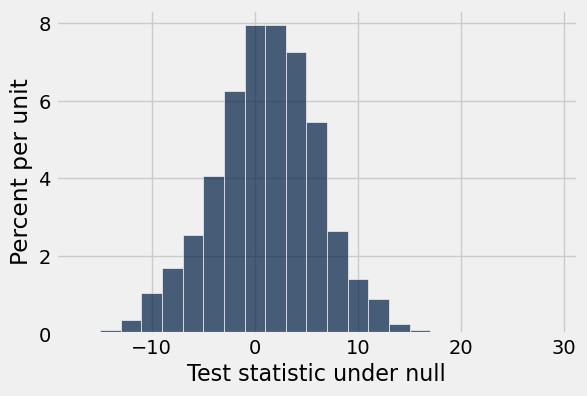

In [18]:
samples=empirical_distribution(LAHR_group,1000)

In [16]:
LAHR_group = MSH_YEAR.where('PLOT_NAME','LAHR').group("YEAR",np.mean)
changes(LAHR_group.column('COVER_% mean'))


17

In [26]:
pvalue = np.count_nonzero(samples >= 7)/len(samples)
pvalue

0.106

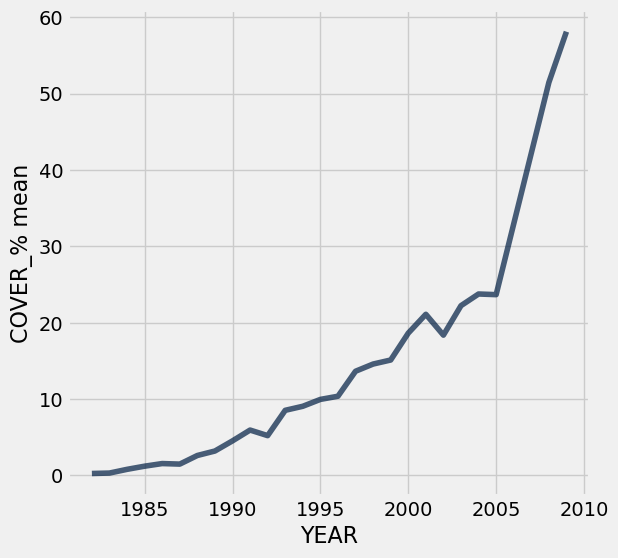

In [71]:
LAHR_group.plot('YEAR', 'COVER_% mean')

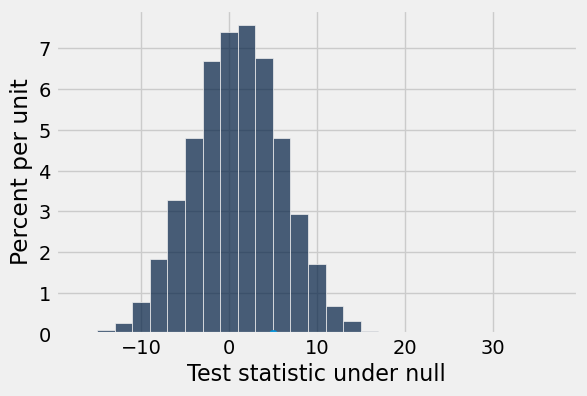

In [61]:
samples = empirical_distribution(COVER_LAHR,10000)
plt.scatter(5,0)

In [65]:
tstatistic = changes(COVER_LAHR.column('RICHNESS mean'),1)
tstatistic

6

In [66]:
pvalue = np.count_nonzero(samples >= tstatistic)/len(samples)
pvalue

0.1142

## More detailed plot

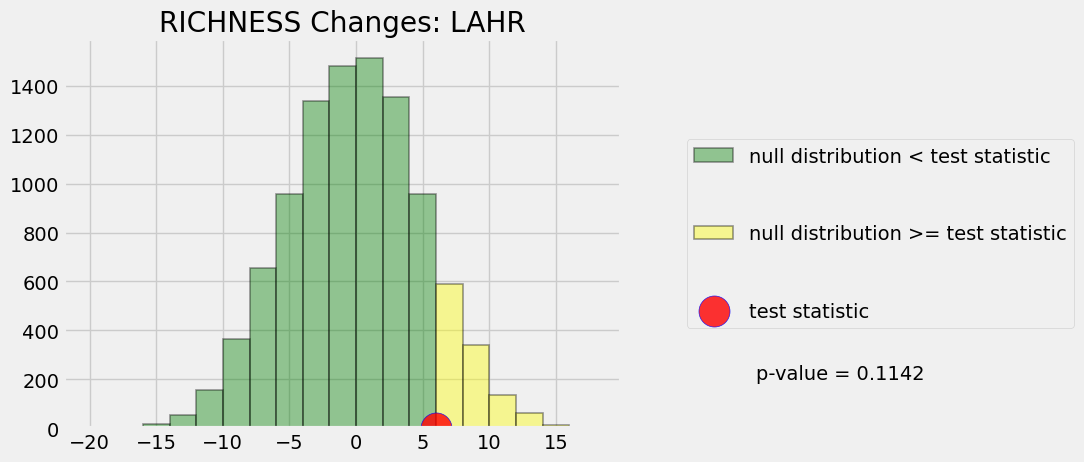

In [68]:
sample1 = samples[samples < changes(COVER_LAHR.column('RICHNESS mean'),1)]
sample2 = samples[samples >= changes(COVER_LAHR.column('RICHNESS mean'),1)]
plt.hist(sample1, label='null distribution < test statistic', bins = np.arange(-20,20,2),color='green',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.hist(sample2, label='null distribution >= test statistic', bins = np.arange(-20,20,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(tstatistic,0, s=500, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('RICHNESS Changes: LAHR')
plt.text(30, 200, 'p-value = '+str(pvalue), color = "black")
plt.show()

In [ ]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean)

In [ ]:
changes(MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean).column('RICHNESS mean'))

In [ ]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD'),10000)